Load necessary modules

In [62]:
import cv2
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pydub
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import cv2

Load audio files from dataset

C:\Users\sixte\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


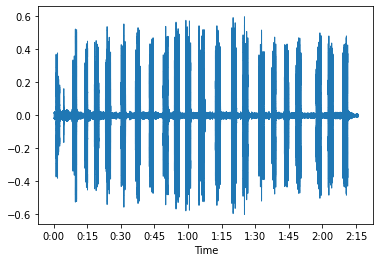

In [63]:
y, sr = librosa.load('build/audio/mp3/Parus-major-168221.mp3')
librosa.display.waveshow(y=y, sr=sr)

Trim down audio length, convert to grayscale and render to mel spectrogram

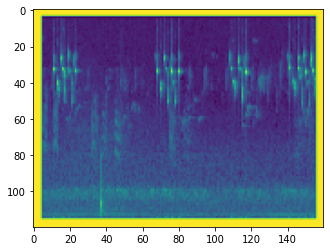

In [64]:
img = cv2.imread('build/images/mel/168221.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (160, 120))
plt.imshow(img)

Load dataset CSV file and create numpy array for file names and labels

In [65]:
df = pd.read_csv('build/audio/metadata.csv', usecols=[0, 3])

X = df['Recording_ID'].values

labels = df['English_name'].values
Y = []
for category in labels:
    class_num = labels.tolist().index(category)
    Y.append(class_num)
Y = np.array(Y)

print(df.head())

   Recording_ID      English_name
0        234032  Common Chaffinch
1        168175  Common Chaffinch
2        213928  Common Chaffinch
3        512407  Common Chaffinch
4        177404  Common Chaffinch


Load image

In [68]:
# ds_train = load image here

Build model similar to Model-2 used in: https://www.researchgate.net/publication/341172446_Environmental_sound_classification_using_a_regularized_deep_convolutional_neural_network_with_data_augmentation

In [ ]:
model = keras.Sequential(
    [
        # Input (image width, image height, channels)
        layers.Input(160, 120, 1),

        # Layer 1 (24 filters, 5*5 kernel)
        layers.Conv2D(24, (5,5), activation='relu'),

        # Layer 2 (36 filters, 4*4)
        layers.Conv2D(36, (4,4), activation='relu'),

        # Layer 3 (48 filters, 3*3)
        layers.Conv2D(48, (3,3), activation='relu', padding='valid'),
        layers.Flatten(),

        # Layer 4 (Dense layer with 60 hidden units)
        layers.Dense(60, activation='relu'),

        # Layer 5 (Dense layer with the same amount of hidden units as categories)
        layers.Dense(len(np.unique(labels)))
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

Begin training the model

In [ ]:
model.fit(ds_train, epochs=10, batch_size=32, validation_split=0.1)